In [34]:
# ! pip install tensorflow


In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Import tha Fashion MNIST dataset

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
(train_images, valid_images) = train_images[:50000], train_images[50000:]
(train_labels, valid_labels) = train_labels[:50000], train_labels[50000:]

In [13]:
print(f"trianing set: {train_images.shape}") # 60,000 images in the training set, each image represented as 28x28 px
print(f"validation set: {valid_images.shape}") # 10,000 images in the validation set, each image represented as 28x28 px
print(f"test set: {test_images.shape}") # 10,000 images in the test set, each image represented as 28x28 px

trianing set: (50000, 28, 28)
validation set: (10000, 28, 28)
test set: (10000, 28, 28)


## Preprocess the data
The pixel values fall in the range of 0 to 255, so i scale values to range 0 to 1 before feeding them to neural networ model. To do so, I divided the values by 255.

I dispalyed the first 25 images from the training set and the label name below in order to verify that the data is in the correct format to build and train the network.

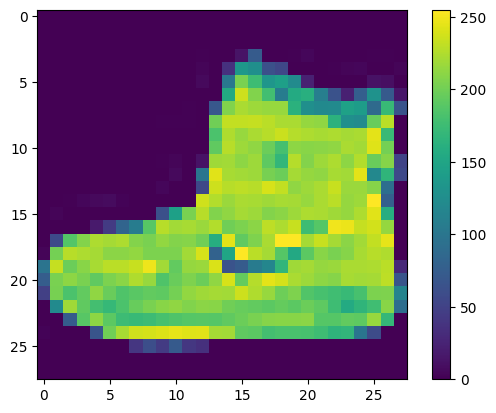

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:

train_images, test_images = train_images / 255.0, test_images / 255.0


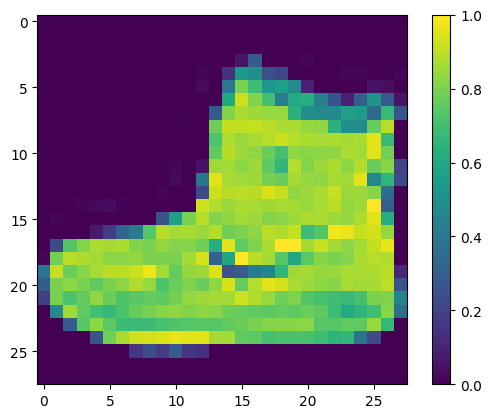

In [40]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

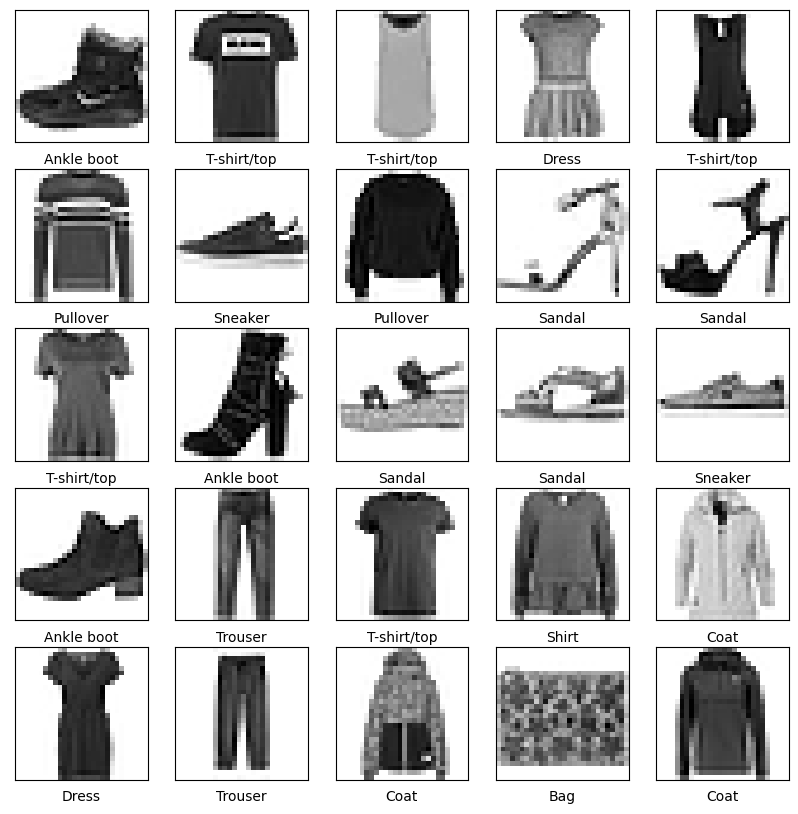

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the model
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.

In [100]:
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [150]:
# LeNet-5 CNN Architecture
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.0005)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=120,activation='relu'))
model.add(Dense(units=84,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 7, 7, 64)        

In [151]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [152]:
chekcpoint = ModelCheckpoint('best_model.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy')

hist = model.fit(train_images,train_labels, batch_size=128,
          callbacks=[chekcpoint],
          steps_per_epoch=train_images.shape[0] // 128, 
          epochs=50,
          verbose=2,
          validation_data=(valid_images, valid_labels)
         )

Epoch 1/50


/home/miriam/.local/lib/python3.10/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.85670, saving model to best_model.hdf5
390/390 - 32s - loss: 1.0529 - accuracy: 0.7708 - val_loss: 0.4384 - val_accuracy: 0.8567 - 32s/epoch - 82ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.85670 to 0.87980, saving model to best_model.hdf5
390/390 - 33s - loss: 0.4117 - accuracy: 0.8601 - val_loss: 0.3482 - val_accuracy: 0.8798 - 33s/epoch - 85ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.87980 to 0.88880, saving model to best_model.hdf5
390/390 - 32s - loss: 0.3556 - accuracy: 0.8781 - val_loss: 0.3263 - val_accuracy: 0.8888 - 32s/epoch - 82ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.88880 to 0.88940, saving model to best_model.hdf5
390/390 - 38s - loss: 0.3195 - accuracy: 0.8903 - val_loss: 0.3200 - val_accuracy: 0.8894 - 38s/epoch - 99ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.88940 to 0.90290, saving model to best_model.hdf5
390/390 - 35s - loss: 0.2974 - accuracy: 0.8983 - val_loss

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

    Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
    Optimizer —This is how the model is updated based on the data it sees and its loss function.
    Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


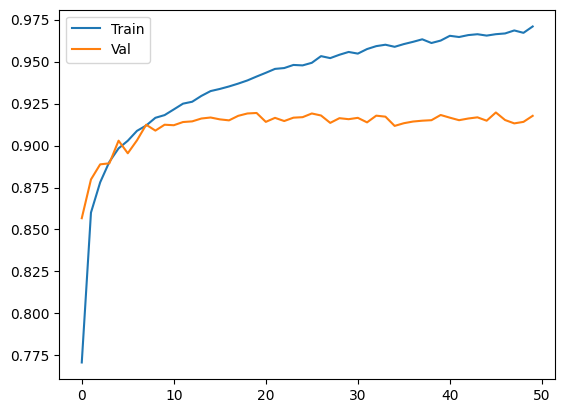

313/313 - 2s - loss: 0.3509 - accuracy: 0.9183 - 2s/epoch - 6ms/step

Test accuracy: 0.9182999730110168


In [153]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [154]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
val_loss, val_acc = model.evaluate(valid_images, valid_labels)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Train accuracy:', train_acc, ' \tTrain loss: ', train_loss)
print('Validation accuracy:', val_acc, ' \tValidation loss: ', val_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3509 - accuracy: 0.9183
Train accuracy: 0.9891200065612793  	Train loss:  0.05997472256422043
Validation accuracy: 0.9176999926567078  	Validation loss:  0.3444628417491913
Test accuracy: 0.9182999730110168


In [155]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 2s 6ms/step


In [156]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


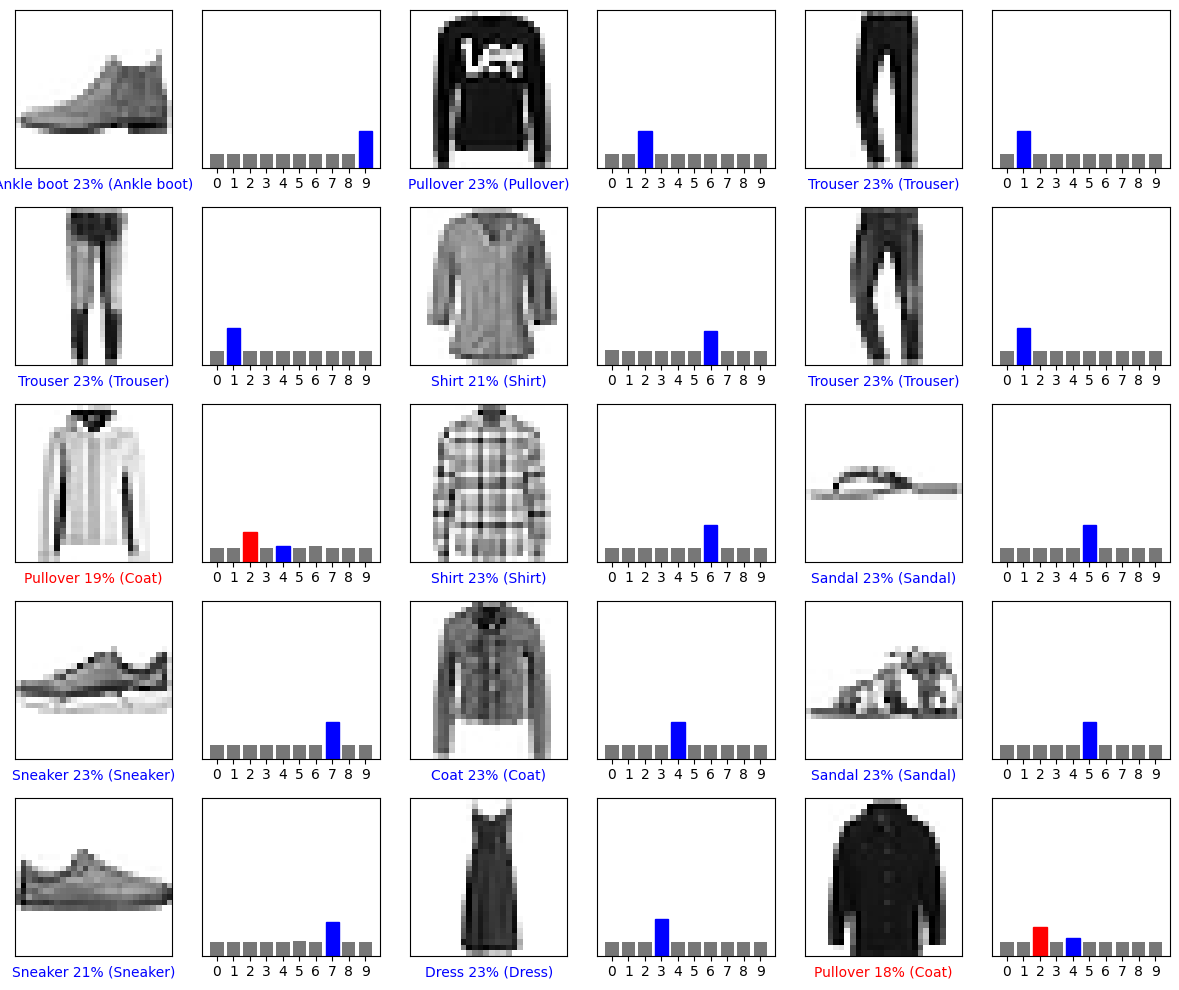

In [157]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
